# Analisis Sentimen Ulasan Aplikasi Shopee Menggunakan Metode Klasifikasi Algoritma SVM

# Impor paket yang diperlukan

In [53]:
import pandas as pd

import numpy as np

In [54]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set path untuk data
BASE_PATH = '/content/drive/MyDrive/Kuliah/Semester 4/PENDAT /Ipyb/SVM Sentimen Ulasan Shopee/'
BASE_PATH_TOOLS = '/content/drive/MyDrive/Kuliah/Semester 4/PENDAT /Ipyb/SVM Sentimen Ulasan Shopee/tools/'
df_busu = pd.read_csv(BASE_PATH + 'Shopee_Sampled_Reviews.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
len(df_busu.index) #kemudian hitung kembali berapa jumlah data yg didapatkan

2500

In [56]:
df_busu[['userName', 'score','at', 'content']].head()  #dari dataset tsb didapatkan banyak sekali kolom, kemudian kolom" tsb kita filter
                                                        #sehingga didapatkan kolom username, score, at dan content

,userName,score,at,content
0,Andi Gunawan,1,2022-12-05 13:29:47,Udah sering belanja trs tapi setiap pengajuan ...
1,Sari Sari,1,2022-12-27 05:36:57,Semenjak di upgrade.. SHOPEE JADI LEMOT
2,Laz Ai,1,2022-08-15 07:00:00,Penyelesaian masalah sangat buruk
3,Kuprit Bae,1,2023-03-16 04:05:30,Apk engga😇 jls
4,Evans irdas,1,2022-12-22 17:34:33,Lelet stress. Udah update terbaru tetap aja lemot


In [57]:
#Run This Code to Sort the Data By Date

new_df = df_busu[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,userName,score,at,content
2015,Yuli Ana,5,2023-04-13 02:00:10,"Selalu puas belanja d shopee,,meskipun ada jug..."
1633,Tengku Fitri handayani,4,2023-04-12 17:30:35,Yah walaupun keselshopee paylater saya di nona...
1835,TRIDA SDN I Ngrtu,4,2023-04-12 13:41:00,Memudahkan berbelanja semua keperluan dari rumah
317,ermadz x,1,2023-04-12 13:33:35,Sudah min 'cukup. 'jangan bilang lagi nyuruh u...
1567,Winan MJ,4,2023-04-12 11:18:32,Sering lemot


In [58]:
my_df = sorted_df[['userName', 'score','at', 'content']] #kemudian kita simpan ke variabel my_df

In [59]:
my_df=my_df[['content', 'score']]#karena kita hanya membutuhkan kolom content dan score maka kita lakukan filter kolom lgi hingga menyisakan kolom content dan score.


In [60]:
my_df.head()

,content,score
2015,"Selalu puas belanja d shopee,,meskipun ada jug...",5
1633,Yah walaupun keselshopee paylater saya di nona...,4
1835,Memudahkan berbelanja semua keperluan dari rumah,4
317,Sudah min 'cukup. 'jangan bilang lagi nyuruh u...,1
1567,Sering lemot,4


# **Hapus duplicate**

In [61]:
my_df.drop_duplicates(subset="content", keep='first', inplace=True)

In [62]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2282 entries, 2015 to 1746
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  2282 non-null   object
 1   score    2282 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 53.5+ KB


In [63]:
my_df.head(5)

,content,score
2015,"Selalu puas belanja d shopee,,meskipun ada jug...",5
1633,Yah walaupun keselshopee paylater saya di nona...,4
1835,Memudahkan berbelanja semua keperluan dari rumah,4
317,Sudah min 'cukup. 'jangan bilang lagi nyuruh u...,1
1567,Sering lemot,4


# **Wordcloud**

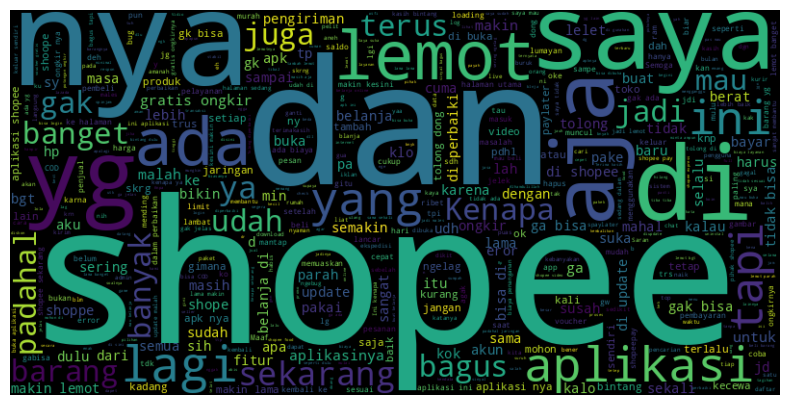

In [64]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Mengisi nilai NaN dengan string kosong ()

my_df['content'] = my_df['content'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ' '.join(my_df['content'].astype(str).tolist())

stopwords=set (STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc=WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)
wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

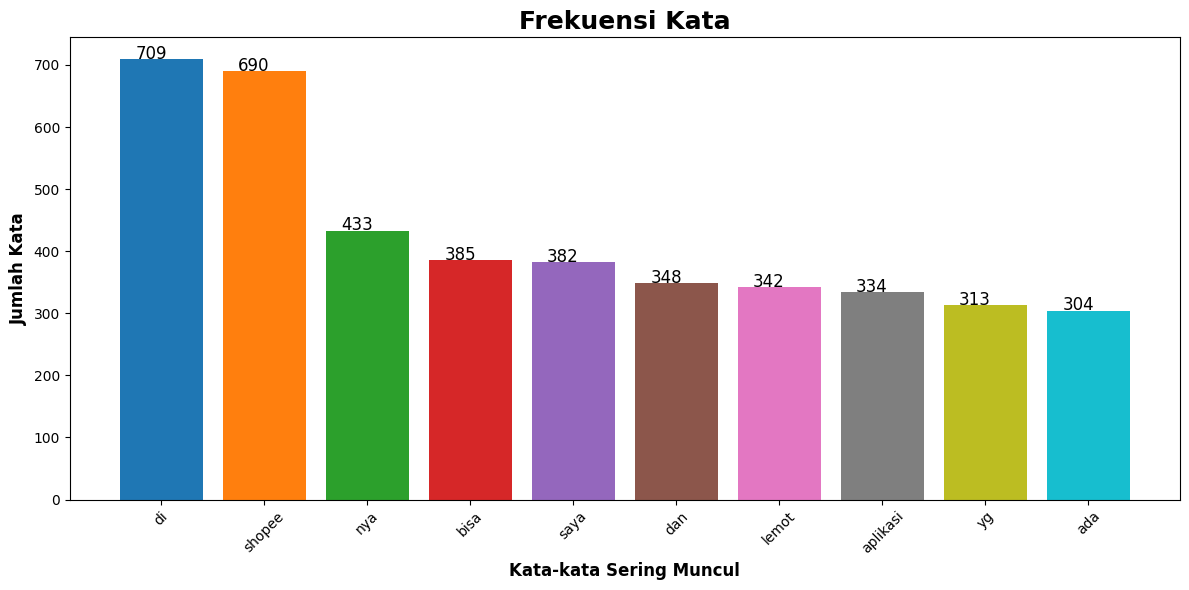

In [65]:
import matplotlib.pyplot as plt
from collections import Counter
import re

# Gabungkan semua teks
text = " ".join(my_df['content'])

# Tokenisasi: memecah teks menjadi kata dan menghilangkan simbol
tokens = re.findall(r'\b\w+\b', text.lower())

# Hitung frekuensi kata
word_count = Counter(tokens)

# Ambil 10 kata paling sering muncul
top_word = word_count.most_common(10)

# Pisahkan menjadi dua list: kata dan jumlahnya
word, count = zip(*top_word)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

# Plot bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel('Kata-kata Sering Muncul', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Kata', fontsize=12, fontweight='bold')
plt.title('Frekuensi Kata', fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Tambahkan label angka di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), ha='center', color='black', fontsize=12)

plt.tight_layout()
plt.show()


# PEMBERSIHAN DATA
# data cleaning

In [66]:
import re
import string
import nltk

# Fungsi untuk menghapus URL
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url= re.compile(r'https?://\S+/www\.\S+')
        return url.sub(r'', tweet)
    else:
      return tweet

#Fungsi untuk menghapus HTML
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F" # emoticons
            u"\U0001F300-\U0001F5FF" # symbols & pictographs
            u"\U0001F680-\U0001F6FF" # transport & map symbols
            u"\U0001F700-\U0001F77F" # alchemical symbols
            u"\U0001F780-\U0001F7FF" # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF" # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF" # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F" # Chess Symbols
            u"\U0001FA70-\U0001FAFF" # Symbols and Pictographs Extended-A
            u"\U0001F004-\U0001F0CF" # Additional emoticons
            u"\U0001F1E0-\U0001F1FF" # flags
                                "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

#Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r' [^a-zA-Z0-9\s]', '', tweet)
    return tweet

# Fungsi untuk menghapus angka
def remove_numbers (tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d', '', tweet)
    return tweet

my_df['cleaning'] = my_df['content'].apply(lambda x: remove_URL(x))
my_df['cleaning'] = my_df['cleaning'].apply(lambda x: remove_html(x))
my_df['cleaning'] = my_df['cleaning'].apply(lambda x: remove_emoji(x))
my_df['cleaning'] = my_df['cleaning'].apply(lambda x: remove_symbols(x))
my_df['cleaning'] = my_df['cleaning'].apply(lambda x: remove_numbers(x))

my_df.head(10)

,content,score,cleaning
2015,"Selalu puas belanja d shopee,,meskipun ada jug...",5,"Selalu puas belanja d shopee,,meskipun ada jug..."
1633,Yah walaupun keselshopee paylater saya di nona...,4,Yah walaupun keselshopee paylater saya di nona...
1835,Memudahkan berbelanja semua keperluan dari rumah,4,Memudahkan berbelanja semua keperluan dari rumah
317,Sudah min 'cukup. 'jangan bilang lagi nyuruh u...,1,Sudah mincukup.jangan bilang lagi nyuruh untuk...
1567,Sering lemot,4,Sering lemot
200,Kurir nya susah di hubungi,1,Kurir nya susah di hubungi
1227,Agak lelet mangkinan,3,Agak lelet mangkinan
2392,Sangat memuaskan,5,Sangat memuaskan
1981,"bagus,tapi loadingnya sedikit lama",4,"bagus,tapi loadingnya sedikit lama"
2077,Shopi is the best,5,Shopi is the best


# Text PreProcessing

# Case Folding
Proses case folding adalah proses mengubah seluruh huruf menjadi huruf kecil. Pada proses ini karakter-karakter 'A'-'Z' yang terdapat pada data diubah kedalam karakter 'a'-'z'.

In [67]:
def case_folding(text):
    if isinstance(text, str):
        return text.lower()
    else:
        return text

my_df['case_folding'] = my_df['cleaning'].apply(case_folding)
my_df.head(5)

,content,score,cleaning,case_folding
2015,"Selalu puas belanja d shopee,,meskipun ada jug...",5,"Selalu puas belanja d shopee,,meskipun ada jug...","selalu puas belanja d shopee,,meskipun ada jug..."
1633,Yah walaupun keselshopee paylater saya di nona...,4,Yah walaupun keselshopee paylater saya di nona...,yah walaupun keselshopee paylater saya di nona...
1835,Memudahkan berbelanja semua keperluan dari rumah,4,Memudahkan berbelanja semua keperluan dari rumah,memudahkan berbelanja semua keperluan dari rumah
317,Sudah min 'cukup. 'jangan bilang lagi nyuruh u...,1,Sudah mincukup.jangan bilang lagi nyuruh untuk...,sudah mincukup.jangan bilang lagi nyuruh untuk...
1567,Sering lemot,4,Sering lemot,sering lemot


### **Normalisasi Kata**

In [68]:
import pandas as pd

#Fungsi penggantian kata tidak baku
def replace_taboo_words (text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku [word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash (word))
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = text
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [69]:
# Baca Dataset
data = pd.DataFrame(my_df[['content', 'score', 'cleaning', 'case_folding']])
data.head(5)

,content,score,cleaning,case_folding
2015,"Selalu puas belanja d shopee,,meskipun ada jug...",5,"Selalu puas belanja d shopee,,meskipun ada jug...","selalu puas belanja d shopee,,meskipun ada jug..."
1633,Yah walaupun keselshopee paylater saya di nona...,4,Yah walaupun keselshopee paylater saya di nona...,yah walaupun keselshopee paylater saya di nona...
1835,Memudahkan berbelanja semua keperluan dari rumah,4,Memudahkan berbelanja semua keperluan dari rumah,memudahkan berbelanja semua keperluan dari rumah
317,Sudah min 'cukup. 'jangan bilang lagi nyuruh u...,1,Sudah mincukup.jangan bilang lagi nyuruh untuk...,sudah mincukup.jangan bilang lagi nyuruh untuk...
1567,Sering lemot,4,Sering lemot,sering lemot


In [70]:
# Baca kamus kata tidak baku
kamus_data = pd.read_excel(BASE_PATH_TOOLS + "kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [71]:
# Terapkan fungsi pengganti kata tidak baku
data['normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))

my_df = pd.DataFrame(data[['content', 'score', 'cleaning', 'case_folding', 'normalisasi']])
my_df.head(10)

,content,score,cleaning,case_folding,normalisasi
2015,"Selalu puas belanja d shopee,,meskipun ada jug...",5,"Selalu puas belanja d shopee,,meskipun ada jug...","selalu puas belanja d shopee,,meskipun ada jug...","selalu puas belanja di shopee,,meskipun ada ju..."
1633,Yah walaupun keselshopee paylater saya di nona...,4,Yah walaupun keselshopee paylater saya di nona...,yah walaupun keselshopee paylater saya di nona...,ya walaupun keselshopee paylater saya di nonak...
1835,Memudahkan berbelanja semua keperluan dari rumah,4,Memudahkan berbelanja semua keperluan dari rumah,memudahkan berbelanja semua keperluan dari rumah,memudahkan berbelanja semua keperluan dari rumah
317,Sudah min 'cukup. 'jangan bilang lagi nyuruh u...,1,Sudah mincukup.jangan bilang lagi nyuruh untuk...,sudah mincukup.jangan bilang lagi nyuruh untuk...,sudah mincukup.jangan bilang lagi nyuruh untuk...
1567,Sering lemot,4,Sering lemot,sering lemot,sering lemot
200,Kurir nya susah di hubungi,1,Kurir nya susah di hubungi,kurir nya susah di hubungi,kurir ya susah di hubungi
1227,Agak lelet mangkinan,3,Agak lelet mangkinan,agak lelet mangkinan,agak lelet mangkinan
2392,Sangat memuaskan,5,Sangat memuaskan,sangat memuaskan,sangat memuaskan
1981,"bagus,tapi loadingnya sedikit lama",4,"bagus,tapi loadingnya sedikit lama","bagus,tapi loadingnya sedikit lama","bagus,tapi loadingnya sedikit lama"
2077,Shopi is the best,5,Shopi is the best,shopi is the best,shopi is the best


# Tokenizing
Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token. Didalam NLP, token diartikan sebagai “kata” meskipun tokenize juga dapat dilakukan pada paragraf maupun kalimat

In [72]:
def tokenize(text):
    tokens = text.split()
    return tokens

my_df['tokenize'] = my_df['normalisasi'].apply(tokenize)
my_df.head(5)

,content,score,cleaning,case_folding,normalisasi,tokenize
2015,"Selalu puas belanja d shopee,,meskipun ada jug...",5,"Selalu puas belanja d shopee,,meskipun ada jug...","selalu puas belanja d shopee,,meskipun ada jug...","selalu puas belanja di shopee,,meskipun ada ju...","[selalu, puas, belanja, di, shopee,,meskipun, ..."
1633,Yah walaupun keselshopee paylater saya di nona...,4,Yah walaupun keselshopee paylater saya di nona...,yah walaupun keselshopee paylater saya di nona...,ya walaupun keselshopee paylater saya di nonak...,"[ya, walaupun, keselshopee, paylater, saya, di..."
1835,Memudahkan berbelanja semua keperluan dari rumah,4,Memudahkan berbelanja semua keperluan dari rumah,memudahkan berbelanja semua keperluan dari rumah,memudahkan berbelanja semua keperluan dari rumah,"[memudahkan, berbelanja, semua, keperluan, dar..."
317,Sudah min 'cukup. 'jangan bilang lagi nyuruh u...,1,Sudah mincukup.jangan bilang lagi nyuruh untuk...,sudah mincukup.jangan bilang lagi nyuruh untuk...,sudah mincukup.jangan bilang lagi nyuruh untuk...,"[sudah, mincukup.jangan, bilang, lagi, nyuruh,..."
1567,Sering lemot,4,Sering lemot,sering lemot,sering lemot,"[sering, lemot]"


# Stopword Removal
Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll. Makna di balik penggunaan stopword yaitu dengan menghapus kata-kata yang memiliki informasi rendah dari sebuah teks, kita dapat fokus pada kata-kata penting sebagai gantinya.

In [73]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

my_df['stopword removal'] = my_df['tokenize'].apply(remove_stopwords)

my_df.head()

,content,score,cleaning,case_folding,normalisasi,tokenize,stopword removal
2015,"Selalu puas belanja d shopee,,meskipun ada jug...",5,"Selalu puas belanja d shopee,,meskipun ada jug...","selalu puas belanja d shopee,,meskipun ada jug...","selalu puas belanja di shopee,,meskipun ada ju...","[selalu, puas, belanja, di, shopee,,meskipun, ...","[puas, belanja, shopee,,meskipun, toko, amanah..."
1633,Yah walaupun keselshopee paylater saya di nona...,4,Yah walaupun keselshopee paylater saya di nona...,yah walaupun keselshopee paylater saya di nona...,ya walaupun keselshopee paylater saya di nonak...,"[ya, walaupun, keselshopee, paylater, saya, di...","[ya, keselshopee, paylater, nonaktif, alasan, ..."
1835,Memudahkan berbelanja semua keperluan dari rumah,4,Memudahkan berbelanja semua keperluan dari rumah,memudahkan berbelanja semua keperluan dari rumah,memudahkan berbelanja semua keperluan dari rumah,"[memudahkan, berbelanja, semua, keperluan, dar...","[memudahkan, berbelanja, keperluan, rumah]"
317,Sudah min 'cukup. 'jangan bilang lagi nyuruh u...,1,Sudah mincukup.jangan bilang lagi nyuruh untuk...,sudah mincukup.jangan bilang lagi nyuruh untuk...,sudah mincukup.jangan bilang lagi nyuruh untuk...,"[sudah, mincukup.jangan, bilang, lagi, nyuruh,...","[mincukup.jangan, bilang, nyuruh, update, apli..."
1567,Sering lemot,4,Sering lemot,sering lemot,sering lemot,"[sering, lemot]",[lemot]


# Stemming
Stemming adalah proses pemetaan dan penguraian bentuk dari suatu kata menjadi bentuk kata dasarnya. Untuk melakukan stemming bahasa Indonesia kita dapat menggunakan library Python Sastrawi yang sudah kita siapkan di awal. Library Sastrawi menerapkan Algoritma Nazief dan Adriani dalam melakukan stemming bahasa Indonesia.

In [75]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [76]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

my_df['steming_data'] = my_df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
my_df.head(5)

,content,score,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
2015,"Selalu puas belanja d shopee,,meskipun ada jug...",5,"Selalu puas belanja d shopee,,meskipun ada jug...","selalu puas belanja d shopee,,meskipun ada jug...","selalu puas belanja di shopee,,meskipun ada ju...","[selalu, puas, belanja, di, shopee,,meskipun, ...","[puas, belanja, shopee,,meskipun, toko, amanah...",puas belanja shopee meski toko amanah tp puas
1633,Yah walaupun keselshopee paylater saya di nona...,4,Yah walaupun keselshopee paylater saya di nona...,yah walaupun keselshopee paylater saya di nona...,ya walaupun keselshopee paylater saya di nonak...,"[ya, walaupun, keselshopee, paylater, saya, di...","[ya, keselshopee, paylater, nonaktif, alasan, ...",ya keselshopee paylater nonaktif alas aneh pak...
1835,Memudahkan berbelanja semua keperluan dari rumah,4,Memudahkan berbelanja semua keperluan dari rumah,memudahkan berbelanja semua keperluan dari rumah,memudahkan berbelanja semua keperluan dari rumah,"[memudahkan, berbelanja, semua, keperluan, dar...","[memudahkan, berbelanja, keperluan, rumah]",mudah belanja perlu rumah
317,Sudah min 'cukup. 'jangan bilang lagi nyuruh u...,1,Sudah mincukup.jangan bilang lagi nyuruh untuk...,sudah mincukup.jangan bilang lagi nyuruh untuk...,sudah mincukup.jangan bilang lagi nyuruh untuk...,"[sudah, mincukup.jangan, bilang, lagi, nyuruh,...","[mincukup.jangan, bilang, nyuruh, update, apli...",mincukup jangan bilang nyuruh update aplikasi ...
1567,Sering lemot,4,Sering lemot,sering lemot,sering lemot,"[sering, lemot]",[lemot],lot


In [77]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2282 entries, 2015 to 1746
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   content           2282 non-null   object
 1   score             2282 non-null   int64 
 2   cleaning          2282 non-null   object
 3   case_folding      2282 non-null   object
 4   normalisasi       2282 non-null   object
 5   tokenize          2282 non-null   object
 6   stopword removal  2282 non-null   object
 7   steming_data      2282 non-null   object
dtypes: int64(1), object(7)
memory usage: 160.5+ KB


In [78]:
my_df.to_csv(BASE_PATH + "hasil_TextPreProcessing_shopee.csv", index= False) #kemudian simpan hasil text preprocessing ke file csv

### **WORDCLOUD SETELAH PREPROCESSING**

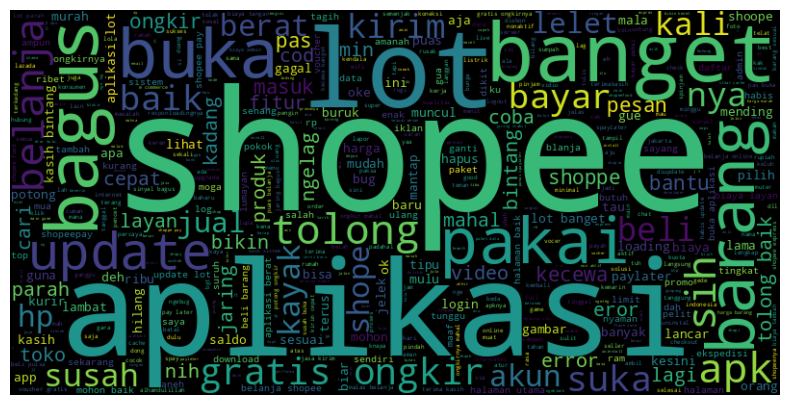

In [79]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Menggabungkan teks dari kolom 'content'
text = ' '.join(my_df['steming_data'].astype(str).tolist())

stopwords=set (STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'ya'])

wc=WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)
wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

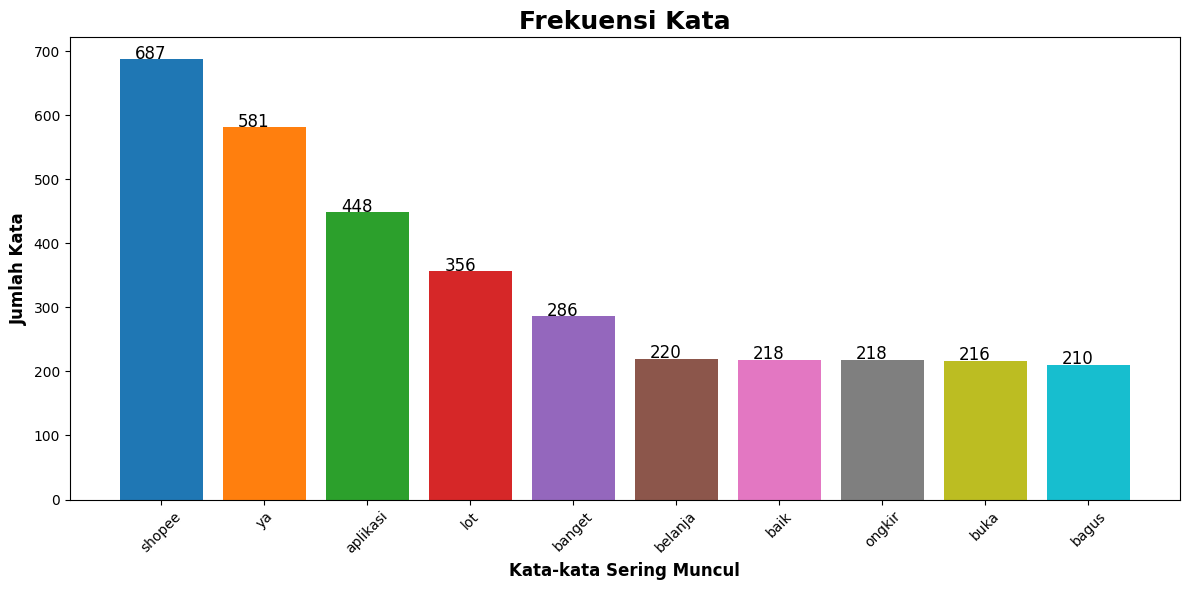

In [80]:
import matplotlib.pyplot as plt
from collections import Counter

# Gabungkan semua teks
text = " ".join(my_df['steming_data'])

tokens = text.split()
# Hitung frekuensi kata
word_count = Counter(tokens)

# Ambil 10 kata paling sering muncul
top_word = word_count.most_common(10)

# Pisahkan menjadi dua list: kata dan jumlahnya
word, count = zip(*top_word)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

# Plot bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel('Kata-kata Sering Muncul', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Kata', fontsize=12, fontweight='bold')
plt.title('Frekuensi Kata', fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Tambahkan label angka di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), ha='center', color='black', fontsize=12)

plt.tight_layout()
plt.show()


# **Labelling Data Lexicon Based**
Link github label positif & Negatif :  https://github.com/fajri91/InSet

In [85]:
import pandas as pd

data = pd.read_csv(BASE_PATH + 'hasil_TextPreProcessing_shopee.csv')
data.head(5)

,content,score,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,"Selalu puas belanja d shopee,,meskipun ada jug...",5,"Selalu puas belanja d shopee,,meskipun ada jug...","selalu puas belanja d shopee,,meskipun ada jug...","selalu puas belanja di shopee,,meskipun ada ju...","['selalu', 'puas', 'belanja', 'di', 'shopee,,m...","['puas', 'belanja', 'shopee,,meskipun', 'toko'...",puas belanja shopee meski toko amanah tp puas
1,Yah walaupun keselshopee paylater saya di nona...,4,Yah walaupun keselshopee paylater saya di nona...,yah walaupun keselshopee paylater saya di nona...,ya walaupun keselshopee paylater saya di nonak...,"['ya', 'walaupun', 'keselshopee', 'paylater', ...","['ya', 'keselshopee', 'paylater', 'nonaktif', ...",ya keselshopee paylater nonaktif alas aneh pak...
2,Memudahkan berbelanja semua keperluan dari rumah,4,Memudahkan berbelanja semua keperluan dari rumah,memudahkan berbelanja semua keperluan dari rumah,memudahkan berbelanja semua keperluan dari rumah,"['memudahkan', 'berbelanja', 'semua', 'keperlu...","['memudahkan', 'berbelanja', 'keperluan', 'rum...",mudah belanja perlu rumah
3,Sudah min 'cukup. 'jangan bilang lagi nyuruh u...,1,Sudah mincukup.jangan bilang lagi nyuruh untuk...,sudah mincukup.jangan bilang lagi nyuruh untuk...,sudah mincukup.jangan bilang lagi nyuruh untuk...,"['sudah', 'mincukup.jangan', 'bilang', 'lagi',...","['mincukup.jangan', 'bilang', 'nyuruh', 'updat...",mincukup jangan bilang nyuruh update aplikasi ...
4,Sering lemot,4,Sering lemot,sering lemot,sering lemot,"['sering', 'lemot']",['lemot'],lot


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   content           2282 non-null   object
 1   score             2282 non-null   int64 
 2   cleaning          2270 non-null   object
 3   case_folding      2270 non-null   object
 4   normalisasi       2270 non-null   object
 5   tokenize          2282 non-null   object
 6   stopword removal  2282 non-null   object
 7   steming_data      2244 non-null   object
dtypes: int64(1), object(7)
memory usage: 142.8+ KB


In [87]:
# Jika ada data kosong maka di drop
my_df = data.dropna()

In [88]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2244 entries, 0 to 2281
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   content           2244 non-null   object
 1   score             2244 non-null   int64 
 2   cleaning          2244 non-null   object
 3   case_folding      2244 non-null   object
 4   normalisasi       2244 non-null   object
 5   tokenize          2244 non-null   object
 6   stopword removal  2244 non-null   object
 7   steming_data      2244 non-null   object
dtypes: int64(1), object(7)
memory usage: 157.8+ KB


In [89]:
import pandas as pd

# Fungsi untuk menentukan sentimen
def determine_sentiment(text):
    positive_count = sum(1 for word in text.split() if word in positive_lexicon)
    negative_count = sum(1 for word in text.split() if word in negative_lexicon)
    if positive_count > negative_count:
        return 'Positif'
    elif positive_count < negative_count:
        return 'Negatif'

# Baca kamus leksikon positif dan negatif
positive_lexicon = set(pd.read_csv(BASE_PATH_TOOLS + 'positive.tsv', sep='\t', header=None)[0])
negative_lexicon = set(pd.read_csv(BASE_PATH_TOOLS + 'negative.tsv', sep='\t', header=None)[0])

def replace_none_sentiment(sentiments):
    replace_flag = "Positif"
    for i in range(len(sentiments)):
        if sentiments[i] is None:
            sentiments[i] = replace_flag
            replace_flag = "Negatif" if replace_flag == "Positif" else "Positif"
    return sentiments

my_df['Sentiment'] = my_df['steming_data'].apply(determine_sentiment)
my_df['Sentiment'] = replace_none_sentiment(my_df['Sentiment'].tolist())

my_df.head(10)


<ipython-input-89-12074f829057>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['Sentiment'] = my_df['steming_data'].apply(determine_sentiment)
<ipython-input-89-12074f829057>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['Sentiment'] = replace_none_sentiment(my_df['Sentiment'].tolist())


,content,score,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,"Selalu puas belanja d shopee,,meskipun ada jug...",5,"Selalu puas belanja d shopee,,meskipun ada jug...","selalu puas belanja d shopee,,meskipun ada jug...","selalu puas belanja di shopee,,meskipun ada ju...","['selalu', 'puas', 'belanja', 'di', 'shopee,,m...","['puas', 'belanja', 'shopee,,meskipun', 'toko'...",puas belanja shopee meski toko amanah tp puas,Positif
1,Yah walaupun keselshopee paylater saya di nona...,4,Yah walaupun keselshopee paylater saya di nona...,yah walaupun keselshopee paylater saya di nona...,ya walaupun keselshopee paylater saya di nonak...,"['ya', 'walaupun', 'keselshopee', 'paylater', ...","['ya', 'keselshopee', 'paylater', 'nonaktif', ...",ya keselshopee paylater nonaktif alas aneh pak...,Positif
2,Memudahkan berbelanja semua keperluan dari rumah,4,Memudahkan berbelanja semua keperluan dari rumah,memudahkan berbelanja semua keperluan dari rumah,memudahkan berbelanja semua keperluan dari rumah,"['memudahkan', 'berbelanja', 'semua', 'keperlu...","['memudahkan', 'berbelanja', 'keperluan', 'rum...",mudah belanja perlu rumah,Positif
3,Sudah min 'cukup. 'jangan bilang lagi nyuruh u...,1,Sudah mincukup.jangan bilang lagi nyuruh untuk...,sudah mincukup.jangan bilang lagi nyuruh untuk...,sudah mincukup.jangan bilang lagi nyuruh untuk...,"['sudah', 'mincukup.jangan', 'bilang', 'lagi',...","['mincukup.jangan', 'bilang', 'nyuruh', 'updat...",mincukup jangan bilang nyuruh update aplikasi ...,Negatif
4,Sering lemot,4,Sering lemot,sering lemot,sering lemot,"['sering', 'lemot']",['lemot'],lot,Negatif
5,Kurir nya susah di hubungi,1,Kurir nya susah di hubungi,kurir nya susah di hubungi,kurir ya susah di hubungi,"['kurir', 'ya', 'susah', 'di', 'hubungi']","['kurir', 'ya', 'susah', 'hubungi']",kurir ya susah hubung,Positif
6,Agak lelet mangkinan,3,Agak lelet mangkinan,agak lelet mangkinan,agak lelet mangkinan,"['agak', 'lelet', 'mangkinan']","['lelet', 'mangkinan']",lelet mangkinan,Negatif
7,Sangat memuaskan,5,Sangat memuaskan,sangat memuaskan,sangat memuaskan,"['sangat', 'memuaskan']",['memuaskan'],muas,Positif
8,"bagus,tapi loadingnya sedikit lama",4,"bagus,tapi loadingnya sedikit lama","bagus,tapi loadingnya sedikit lama","bagus,tapi loadingnya sedikit lama","['bagus,tapi', 'loadingnya', 'sedikit', 'lama']","['bagus,tapi', 'loadingnya']",bagus tapi loadingnya,Positif
9,Shopi is the best,5,Shopi is the best,shopi is the best,shopi is the best,"['shopi', 'is', 'the', 'best']","['shopi', 'is', 'the', 'best']",shopi is the best,Negatif


<ipython-input-90-4e783ebacb91>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette="pastel")


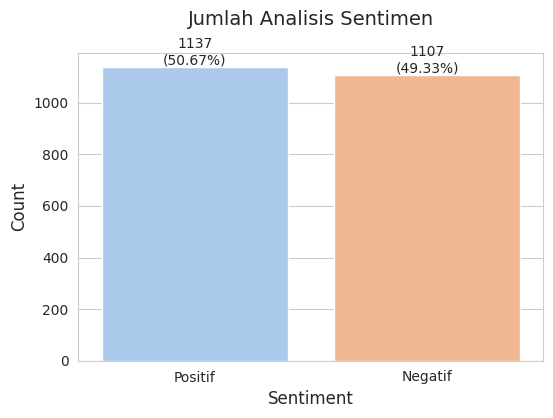

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = my_df['Sentiment'].value_counts()
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette="pastel")
plt.title("Jumlah Analisis Sentimen", fontsize=14, pad=20)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)

total = len(my_df['Sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10,f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [91]:
my_df.to_csv(BASE_PATH + "hasil_Labelling_Data.csv",encoding='utf8', index= False) #kemudian simpan hasil text preprocessing ke file csv

# **ALGORITMA SUPPORT VECTOR MACHINE (SVM)**

In [92]:
import pandas as pd

data = pd.read_csv(BASE_PATH + 'hasil_Labelling_Data.csv')
data.head(5)

,content,score,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,"Selalu puas belanja d shopee,,meskipun ada jug...",5,"Selalu puas belanja d shopee,,meskipun ada jug...","selalu puas belanja d shopee,,meskipun ada jug...","selalu puas belanja di shopee,,meskipun ada ju...","['selalu', 'puas', 'belanja', 'di', 'shopee,,m...","['puas', 'belanja', 'shopee,,meskipun', 'toko'...",puas belanja shopee meski toko amanah tp puas,Positif
1,Yah walaupun keselshopee paylater saya di nona...,4,Yah walaupun keselshopee paylater saya di nona...,yah walaupun keselshopee paylater saya di nona...,ya walaupun keselshopee paylater saya di nonak...,"['ya', 'walaupun', 'keselshopee', 'paylater', ...","['ya', 'keselshopee', 'paylater', 'nonaktif', ...",ya keselshopee paylater nonaktif alas aneh pak...,Positif
2,Memudahkan berbelanja semua keperluan dari rumah,4,Memudahkan berbelanja semua keperluan dari rumah,memudahkan berbelanja semua keperluan dari rumah,memudahkan berbelanja semua keperluan dari rumah,"['memudahkan', 'berbelanja', 'semua', 'keperlu...","['memudahkan', 'berbelanja', 'keperluan', 'rum...",mudah belanja perlu rumah,Positif
3,Sudah min 'cukup. 'jangan bilang lagi nyuruh u...,1,Sudah mincukup.jangan bilang lagi nyuruh untuk...,sudah mincukup.jangan bilang lagi nyuruh untuk...,sudah mincukup.jangan bilang lagi nyuruh untuk...,"['sudah', 'mincukup.jangan', 'bilang', 'lagi',...","['mincukup.jangan', 'bilang', 'nyuruh', 'updat...",mincukup jangan bilang nyuruh update aplikasi ...,Negatif
4,Sering lemot,4,Sering lemot,sering lemot,sering lemot,"['sering', 'lemot']",['lemot'],lot,Negatif


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   content           2244 non-null   object
 1   score             2244 non-null   int64 
 2   cleaning          2244 non-null   object
 3   case_folding      2244 non-null   object
 4   normalisasi       2244 non-null   object
 5   tokenize          2244 non-null   object
 6   stopword removal  2244 non-null   object
 7   steming_data      2244 non-null   object
 8   Sentiment         2244 non-null   object
dtypes: int64(1), object(8)
memory usage: 157.9+ KB


In [94]:
my_df = data.dropna()

In [95]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   content           2244 non-null   object
 1   score             2244 non-null   int64 
 2   cleaning          2244 non-null   object
 3   case_folding      2244 non-null   object
 4   normalisasi       2244 non-null   object
 5   tokenize          2244 non-null   object
 6   stopword removal  2244 non-null   object
 7   steming_data      2244 non-null   object
 8   Sentiment         2244 non-null   object
dtypes: int64(1), object(8)
memory usage: 157.9+ KB


**Spliting Data**

memecah data test 20% dari keseluruhan data

In [96]:
from sklearn.model_selection import train_test_split
# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(my_df['steming_data'], my_df['Sentiment'], test_size=0.2, random_state=42)

In [97]:
# Simpan data latih ke file
train_set = pd.DataFrame({'text': X_train, 'Sentiment': y_train})
train_set.to_csv(BASE_PATH + 'train_data.csv', index=False)

In [98]:
# Simpan data uji ke file
test_set = pd.DataFrame({'text': X_test, 'Sentiment': y_test})
test_set.to_csv(BASE_PATH + 'test_data.csv', index=False)

In [99]:
# Menampilkan informasi jumlah data
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 1795
Jumlah data uji: 449


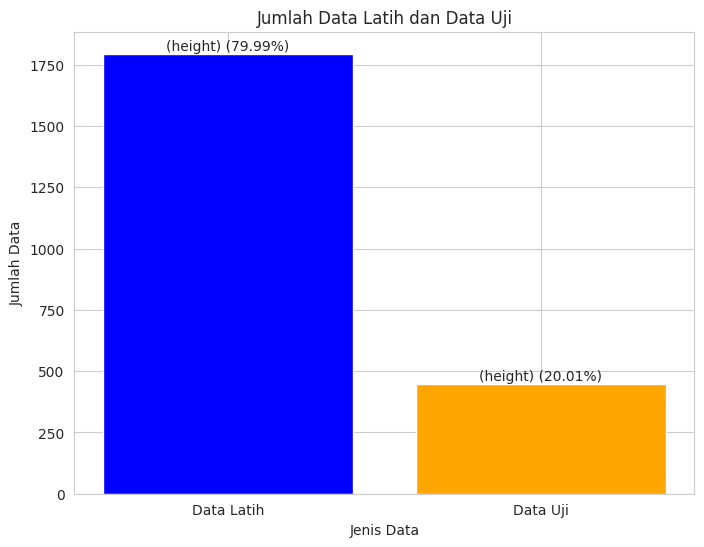

In [100]:
import matplotlib.pyplot as plt

#Jumlah data latih dan data uji
train_size = len(X_train)
test_size = len(X_test)

# Membuat plot
plt.figure(figsize=(8, 6))
bars= plt.bar(['Data Latih', 'Data Uji'], [train_size, test_size], color=['blue', 'orange'])

# Menambahkan label untuk setiap bar (dalam kurung persentase)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.7, f'(height) ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Latih dan Data Uji')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()

### **SUPPORT VECTOR MACHINE (SVM)**

In [101]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [102]:
# Mendefinisikan vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [103]:
# Menampilkan hasil vektorisasi
print("Matriks Vektorisasi untuk Data Latih:")
print(X_train_vectorized.toarray())

#menampilkan sebagian kecil matriks
print("\nSebagian kecil Matriks Vektorisasi untuk Data Latih:")
print(X_train_vectorized[:5, :].toarray())

Matriks Vektorisasi untuk Data Latih:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Sebagian kecil Matriks Vektorisasi untuk Data Latih:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [104]:
# Membuat dan melatih model SVM (model jenis linear)
svm = SVC(kernel='linear')
svm.fit(X_train_vectorized, y_train)

SVC(kernel='linear')

In [105]:
# Evaluasi model
y_pred_svm = svm.predict(X_test_vectorized)

In [106]:
# Menampilkan confusion matrix dalam angka
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix (SVM):")
print(cm_svm)

Confusion Matrix (SVM):
[[168  59]
 [ 50 172]]


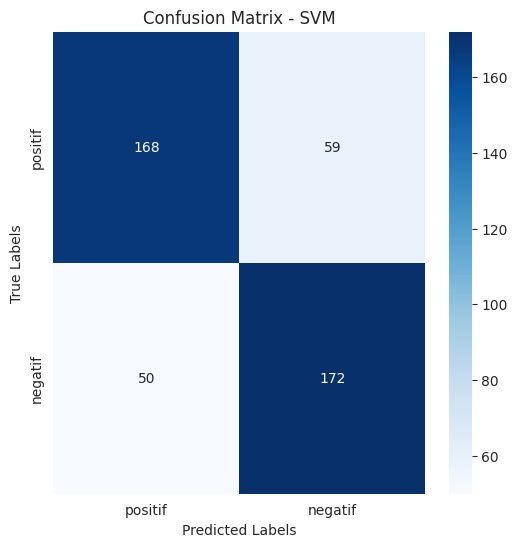

In [107]:
# Fungsi untuk plot confusion matrix
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['positif', 'negatif'],
                yticklabels=['positif', 'negatif'])

    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

plot_confusion_matrix('SVM', y_test, y_pred_svm)

In [108]:
# Menampilkan accuracy untuk SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Akurasi (SVM):", accuracy_svm)
print("")

accuracy_svm_percentage = accuracy_svm * 100
print("SVM Accuracy", "{:.2f}%".format(accuracy_svm_percentage))

#Menampilkan classification report untuk SVM
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

Akurasi (SVM): 0.7572383073496659

SVM Accuracy 75.72%
SVM Classification Report:
              precision    recall  f1-score   support

     Negatif       0.77      0.74      0.76       227
     Positif       0.74      0.77      0.76       222

    accuracy                           0.76       449
   macro avg       0.76      0.76      0.76       449
weighted avg       0.76      0.76      0.76       449



# **WORDCLOUD**

In [109]:
import pandas as pd

data = pd.read_csv(BASE_PATH + 'hasil_Labelling_Data.csv')
data.head()

,content,score,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,"Selalu puas belanja d shopee,,meskipun ada jug...",5,"Selalu puas belanja d shopee,,meskipun ada jug...","selalu puas belanja d shopee,,meskipun ada jug...","selalu puas belanja di shopee,,meskipun ada ju...","['selalu', 'puas', 'belanja', 'di', 'shopee,,m...","['puas', 'belanja', 'shopee,,meskipun', 'toko'...",puas belanja shopee meski toko amanah tp puas,Positif
1,Yah walaupun keselshopee paylater saya di nona...,4,Yah walaupun keselshopee paylater saya di nona...,yah walaupun keselshopee paylater saya di nona...,ya walaupun keselshopee paylater saya di nonak...,"['ya', 'walaupun', 'keselshopee', 'paylater', ...","['ya', 'keselshopee', 'paylater', 'nonaktif', ...",ya keselshopee paylater nonaktif alas aneh pak...,Positif
2,Memudahkan berbelanja semua keperluan dari rumah,4,Memudahkan berbelanja semua keperluan dari rumah,memudahkan berbelanja semua keperluan dari rumah,memudahkan berbelanja semua keperluan dari rumah,"['memudahkan', 'berbelanja', 'semua', 'keperlu...","['memudahkan', 'berbelanja', 'keperluan', 'rum...",mudah belanja perlu rumah,Positif
3,Sudah min 'cukup. 'jangan bilang lagi nyuruh u...,1,Sudah mincukup.jangan bilang lagi nyuruh untuk...,sudah mincukup.jangan bilang lagi nyuruh untuk...,sudah mincukup.jangan bilang lagi nyuruh untuk...,"['sudah', 'mincukup.jangan', 'bilang', 'lagi',...","['mincukup.jangan', 'bilang', 'nyuruh', 'updat...",mincukup jangan bilang nyuruh update aplikasi ...,Negatif
4,Sering lemot,4,Sering lemot,sering lemot,sering lemot,"['sering', 'lemot']",['lemot'],lot,Negatif


In [110]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pisahkan dataset berdasarkan sentimen
sentimen_negatif = data[data['Sentiment'] == 'Negatif'] ['steming_data'].str.cat(sep=' ')
sentimen_positif = data[data['Sentiment'] == 'Positif'] ['steming_data'].str.cat(sep=' ')

In [111]:
# Fungsi untuk membuat dan menampilkan WordCloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='black').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

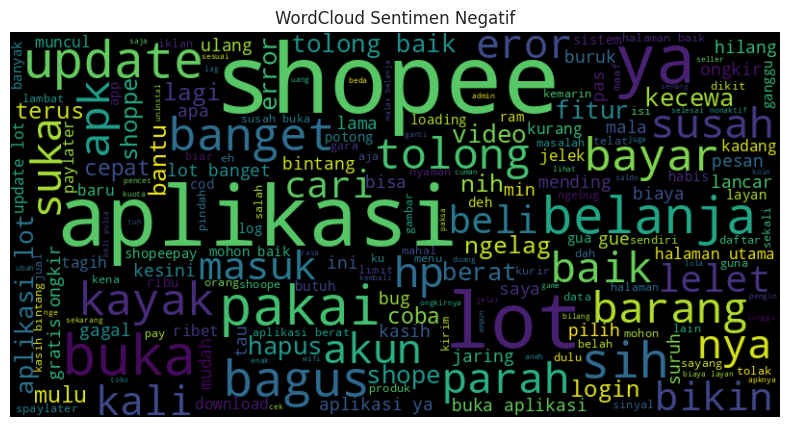

In [112]:
# Membuat WordCloud untuk sentimen negatif
create_wordcloud(sentimen_negatif, 'WordCloud Sentimen Negatif')

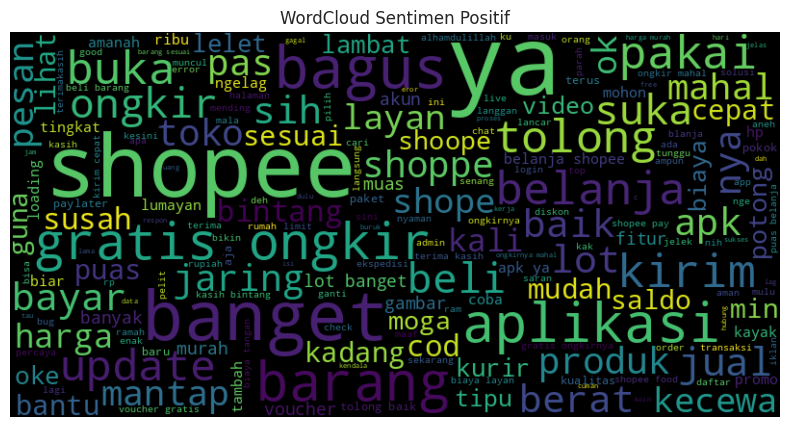

In [113]:
# Membuat WordCloud untuk sentimen positif
create_wordcloud(sentimen_positif, 'WordCloud Sentimen Positif')

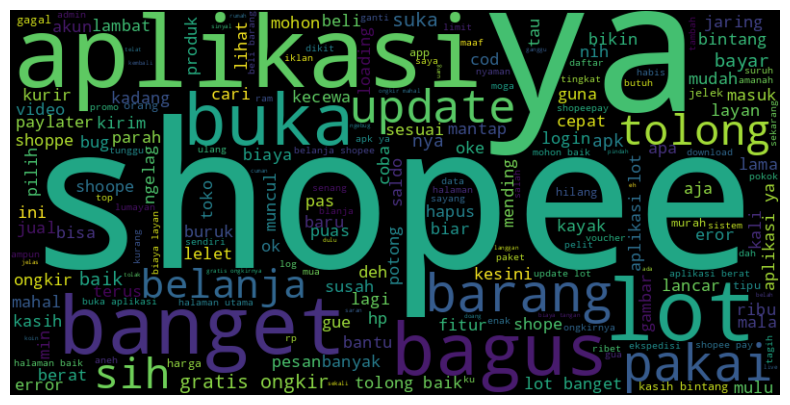

In [114]:
text = ' '.join(data['steming_data'].apply(lambda x: str(x) if isinstance(x, (str, int, float)) else ''))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

## **RATING**

In [116]:
import pandas as pd

data = pd.read_csv(BASE_PATH + "hasil_Labelling_Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   content           2244 non-null   object
 1   score             2244 non-null   int64 
 2   cleaning          2244 non-null   object
 3   case_folding      2244 non-null   object
 4   normalisasi       2244 non-null   object
 5   tokenize          2244 non-null   object
 6   stopword removal  2244 non-null   object
 7   steming_data      2244 non-null   object
 8   Sentiment         2244 non-null   object
dtypes: int64(1), object(8)
memory usage: 157.9+ KB


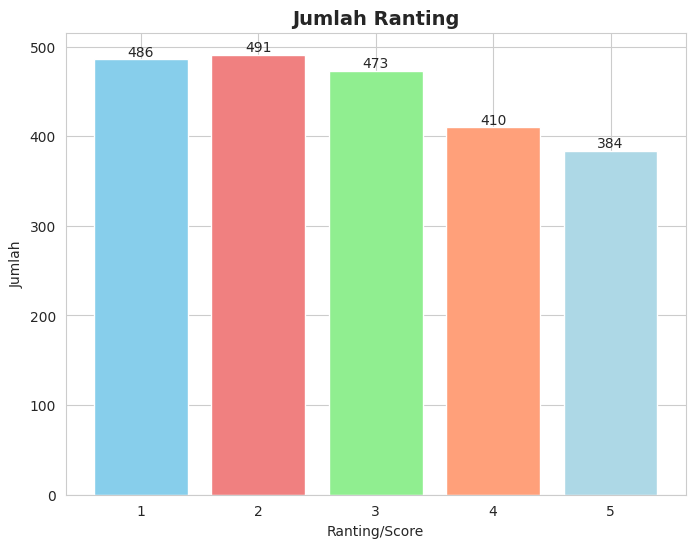

In [118]:
import matplotlib.pyplot as plt

rating_counts = data['score'].value_counts()
rating_counts = rating_counts.sort_index()

colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue']

plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)
plt.title('Jumlah Ranting', fontsize=14, fontweight='bold')
plt.xlabel('Ranting/Score')
plt.ylabel('Jumlah')
plt.xticks(rating_counts.index)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.show()